In [1]:
import pandas as pd

graduation_data = pd.read_csv('../../outputs/Assignment_3/final_selected_features_data.csv')

graduation_data.head()

,PC1,PC2,PC7,PC9,PC11,PC13,PC14,Target
0,-3.757248,2.813776,0.437770,-0.754353,2.131117,-1.095323,-2.073924,Dropout
1,0.048755,-0.420491,1.397157,0.340443,-0.655704,0.720652,1.034150,Enrolled
2,0.291291,-1.890523,-1.299184,1.193613,0.470464,0.399251,0.012664,Graduate
3,-3.910642,3.918735,1.210960,0.096734,0.434115,1.073013,0.248765,Dropout
4,0.995205,-2.689153,-0.484414,-1.307756,-0.397952,0.041818,0.789134,Graduate


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target labels and split dataset into features and target variable
graduation_data['Target'] = LabelEncoder().fit_transform(graduation_data['Target'])

# Ensure the target variable is binary (0 or 1)
if len(graduation_data['Target'].unique()) > 2:
	graduation_data = graduation_data[graduation_data['Target'] <= 1]

X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Standardize features and split the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize a dictionary to store the results
results = {}

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
results['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# Support Vector Machine with RBF Kernel
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
results['SVM with RBF Kernel'] = accuracy_score(y_test, y_pred_svm)

# Neural Network Model (MLP)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)
results['Neural Network'] = accuracy_score(y_test, y_pred_mlp)

# Display results for all algorithms
results


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Decision Tree': 0.64,
 'Naive Bayes': 0.7371428571428571,
 'Random Forest': 0.7523809523809524,
 'SVM with RBF Kernel': 0.7485714285714286,
 'Neural Network': 0.7485714285714286}

In [11]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Define features and target variable
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=1)

# Measure training time
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure inference time
start_time = time.time()
y_pred = clf.predict(X_test)
inference_time = time.time() - start_time

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Display results
print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")
print(f"Decision Tree Classifier F1 Score: {f1 * 100:.2f}%")
print(f"Decision Tree Classifier Precision: {precision * 100:.2f}%")
print(f"Decision Tree Classifier Recall: {recall * 100:.2f}%")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")


Decision Tree Classifier Accuracy: 70.29%
Decision Tree Classifier F1 Score: 69.76%
Decision Tree Classifier Precision: 69.81%
Decision Tree Classifier Recall: 70.29%
Training Time: 0.0216 seconds
Inference Time: 0.0015 seconds


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest Classifier
rf = RandomForestClassifier(random_state=1)

# Measure training time
start_time = time.time()
rf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure inference time
start_time = time.time()
y_pred = rf.predict(X_test)
inference_time = time.time() - start_time

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Display results
print(f"Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")
print(f"Random Forest Classifier F1 Score: {f1 * 100:.2f}%")
print(f"Random Forest Classifier Precision: {precision * 100:.2f}%")
print(f"Random Forest Classifier Recall: {recall * 100:.2f}%")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")


Random Forest Classifier Accuracy: 75.43%
Random Forest Classifier F1 Score: 75.09%
Random Forest Classifier Precision: 75.17%
Random Forest Classifier Recall: 75.43%
Training Time: 0.3709 seconds
Inference Time: 0.0099 seconds


In [13]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes Classifier
nb = GaussianNB()

# Measure training time
start_time = time.time()
nb.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure inference time
start_time = time.time()
y_pred = nb.predict(X_test)
inference_time = time.time() - start_time

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Display results
print(f"Naive Bayes Classifier Accuracy: {accuracy * 100:.2f}%")
print(f"Naive Bayes Classifier F1 Score: {f1 * 100:.2f}%")
print(f"Naive Bayes Classifier Precision: {precision * 100:.2f}%")
print(f"Naive Bayes Classifier Recall: {recall * 100:.2f}%")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")


Naive Bayes Classifier Accuracy: 74.86%
Naive Bayes Classifier F1 Score: 74.96%
Naive Bayes Classifier Precision: 75.15%
Naive Bayes Classifier Recall: 74.86%
Training Time: 0.0085 seconds
Inference Time: 0.0000 seconds


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import time

# Define features and target variable
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)


# Function to train and evaluate SVM with different kernels
def evaluate_svm_kernel(kernel_type, degree=None):
    if kernel_type == 'poly':
        model = SVC(kernel=kernel_type, degree=degree, C=1.0, random_state=125)
    else:
        model = SVC(kernel=kernel_type, C=1.0, random_state=125)

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Measure inference time
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print results
    print(f"\nSVM with {kernel_type} kernel (degree={degree} if polynomial):")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Inference Time: {inference_time:.4f} seconds")

# Evaluate the SVM with RBF kernel
evaluate_svm_kernel('rbf')



SVM with rbf kernel (degree=None if polynomial):
Accuracy: 76.00%
F1 Score: 76.36%
Precision: 77.44%
Recall: 76.00%
Training Time: 0.0330 seconds
Inference Time: 0.0140 seconds


In [14]:
from sklearn.neural_network import MLPClassifier

# Scale features for neural network training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled dataset into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, test_size=0.2, random_state=125)

# Create and train the Neural Network Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=125)

# Measure training time
start_time = time.time()
mlp.fit(X_train_nn, y_train_nn)
training_time = time.time() - start_time

# Measure inference time
start_time = time.time()
y_pred_nn = mlp.predict(X_test_nn)
inference_time = time.time() - start_time

# Calculate metrics
accuracy_nn = accuracy_score(y_test_nn, y_pred_nn)
f1_nn = f1_score(y_test_nn, y_pred_nn, average='weighted')
precision_nn = precision_score(y_test_nn, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test_nn, y_pred_nn, average='weighted')

# Display results
print(f"Neural Network Classifier Accuracy: {accuracy_nn * 100:.2f}%")
print(f"Neural Network Classifier F1 Score: {f1_nn * 100:.2f}%")
print(f"Neural Network Classifier Precision: {precision_nn * 100:.2f}%")
print(f"Neural Network Classifier Recall: {recall_nn * 100:.2f}%")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")


Neural Network Classifier Accuracy: 76.00%
Neural Network Classifier F1 Score: 76.30%
Neural Network Classifier Precision: 77.00%
Neural Network Classifier Recall: 76.00%
Training Time: 3.6769 seconds
Inference Time: 0.0005 seconds


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import time

# Define features and target variable
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=125),
    "Random Forest": RandomForestClassifier(random_state=125),
    "Naive Bayes": GaussianNB(),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=125),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=125)
}

# Initialize results dictionary
results = {
    "Model": [],
    "Training Time (s)": [],
    "Inference Time (s)": []
}

# Evaluate each model
for model_name, model in models.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Measure inference time
    start_time = time.time()
    model.predict(X_test)
    inference_time = time.time() - start_time

    # Append results
    results["Model"].append(model_name)
    results["Training Time (s)"].append(round(training_time, 4))
    results["Inference Time (s)"].append(round(inference_time, 4))

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results as a table
print(results_df)


              Model  Training Time (s)  Inference Time (s)
0     Decision Tree             0.0222              0.0030
1     Random Forest             0.2424              0.0005
2       Naive Bayes             0.0000              0.0000
3  SVM (RBF Kernel)             0.0324              0.0145
4    Neural Network             2.2140              0.0010


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


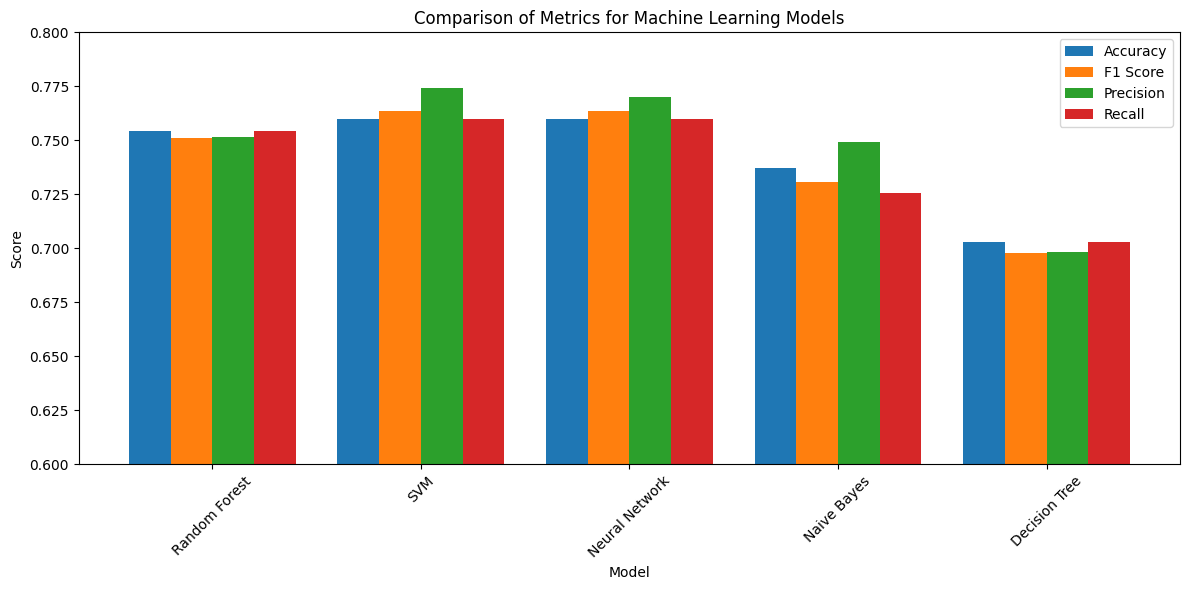

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and their corresponding metric values
models = ['Random Forest', 'SVM', 'Neural Network', 'Naive Bayes', 'Decision Tree']

# Define metric values for each model
accuracies = [0.7543, 0.7600, 0.7600, 0.7371, 0.7029]
f1_scores = [0.7509, 0.7636, 0.7636, 0.7308, 0.6976]
precisions = [0.7517, 0.7744, 0.7700, 0.7493, 0.6981]
recalls = [0.7543, 0.7600, 0.7600, 0.7257, 0.7029]

# Create a numpy array for grouped bar positions
x = np.arange(len(models))

# Set the width for each bar
width = 0.2

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5 * width, accuracies, width, label='Accuracy')
plt.bar(x - 0.5 * width, f1_scores, width, label='F1 Score')
plt.bar(x + 0.5 * width, precisions, width, label='Precision')
plt.bar(x + 1.5 * width, recalls, width, label='Recall')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Machine Learning Models')
plt.xticks(x, models, rotation=45)
plt.ylim(0.6, 0.8)
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
